# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Fundamentals of estimation

## Example 1, the mean

In [1]:
import numpy as np
def mean_estimator(x): # x is our data
    return np.mean(x)

In [4]:
sample = np.random.normal(size=100)
mean_estimator(sample)

0.1998646536422976

## Example 2, linear regression

In [5]:
def linear_regression(x,y):
    # Here x,y is our data
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x,y)
    return lambda x1: lr.predict(x1)

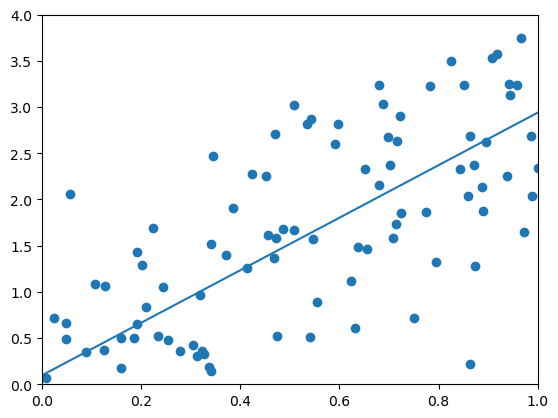

In [6]:
sample_x = np.random.uniform(0,1,size=100).reshape(-1,1)
sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
g_star = linear_regression(sample_x,sample_y)

# Lets plot out function
import matplotlib.pyplot as plt
x_plot = np.linspace(0,1,10)
plt.xlim(0,1)
plt.ylim(0,4)
plt.plot(x_plot,g_star(x_plot.reshape(-1,1)))
plt.scatter(sample_x,sample_y)

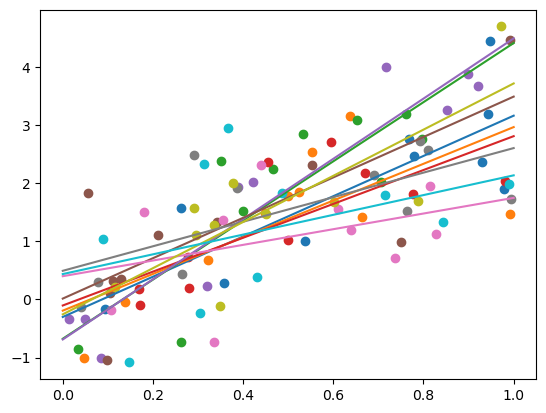

In [7]:
import matplotlib.pyplot as plt
for i in range(10):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_star = linear_regression(sample_x,sample_y)

    # Lets plot out function
    plt.scatter(sample_x,sample_y)
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_star(x_plot.reshape(-1,1)))

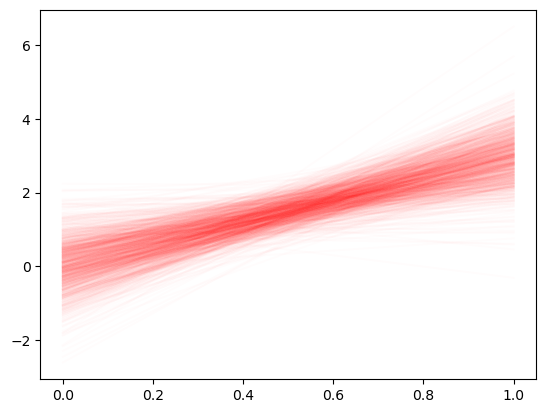

In [8]:
import matplotlib.pyplot as plt
for i in range(1000):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_star = linear_regression(sample_x,sample_y)

    # Lets plot out function
    #plt.scatter(sample_x,sample_y,alpha=0.1,color='blue')
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_star(x_plot.reshape(-1,1)),alpha=0.01,color='red')

## Example, testing error

In [ ]:
def gen_data(n_samples):
    sample_x = np.random.uniform(0,1,size=n_samples).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    return sample_x,sample_y

In [ ]:
xtrain,ytrain = gen_data(10)
g_star = linear_regression(xtrain,ytrain)

In [ ]:
def test_error():
    xtest,ytest = gen_data(100)
    predictions = g_star(xtest)
    residual = ytest-predictions
    return np.mean(residual**2)

In [ ]:
plt.hist([test_error() for i in range(100)])

## Strong law of large numbers

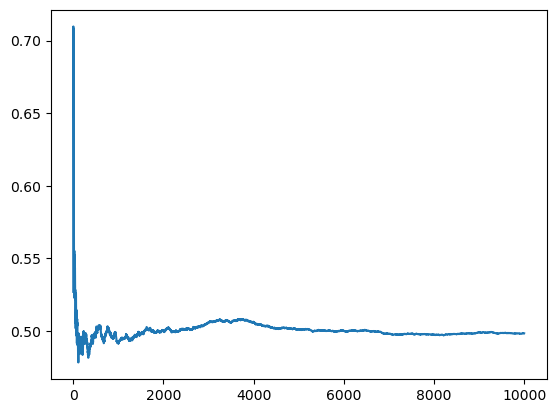

In [10]:
X = np.random.uniform(0,1,size=10000)
mean = np.cumsum(X)/np.arange(1,X.shape[0]+1)
plt.plot(mean)

In [ ]:
for i in range(100):
    X = np.random.exponential(size=1000)
    Y = np.sin(X)*np.exp(X)/X
    mean = np.cumsum(Y)/np.arange(1,Y.shape[0]+1)
    plt.plot(mean,color='blue',alpha=0.1)

## Convergence in distribution

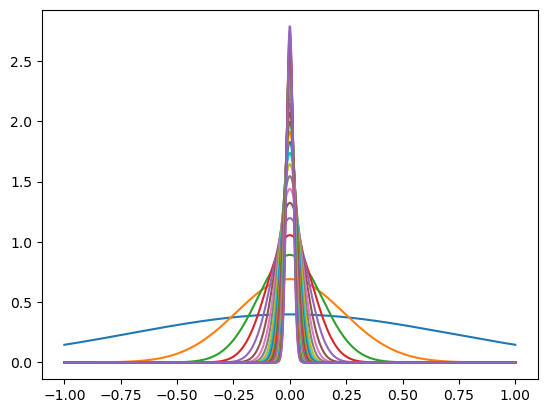

In [11]:
for  i in range(1,50,2):
    x = np.linspace(-1,1,1000)
    sigma = 1/i
    plt.plot(x,(1/np.sqrt(2*sigma*np.pi))*np.exp(-x**2/sigma**2))